In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import optimizers, losses, activations, models
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Input, Dropout, Convolution1D, MaxPool1D, GlobalMaxPool1D, GlobalAveragePooling1D, concatenate, SimpleRNN, LSTM
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.metrics import f1_score, accuracy_score
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split



In [3]:
df_train = pd.read_csv("C:/00ETH/ml4h/Project1/archive/mitbih_train.csv", header=None)
df_train = df_train.sample(frac=1)
df_test = pd.read_csv("C:/00ETH/ml4h/Project1/archive/mitbih_test.csv", header=None)

Y = np.array(df_train[187].values).astype(np.int8)
X = np.array(df_train[list(range(187))].values)[..., np.newaxis]

Y_test = np.array(df_test[187].values).astype(np.int8)
X_test = np.array(df_test[list(range(187))].values)[..., np.newaxis]

In [4]:
# Code from scikit-learn

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]), 
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")
  

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [20]:
def get_model1():
    nclass = 5
    inp = Input(shape=(187, 1))
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(inp)
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = GlobalMaxPool1D()(img_1)
    img_1 = Dropout(rate=0.2)(img_1)

    dense_1 = Dense(64, activation=activations.relu, name="dense_1")(img_1)
    dense_1 = Dense(64, activation=activations.relu, name="dense_2")(dense_1)
    dense_1 = Dense(nclass, activation=activations.sigmoid, name="dense_3_ptbdb")(dense_1)

    model = models.Model(inputs=inp, outputs=dense_1)
    opt = optimizers.Adam(0.001)

    model.compile(optimizer=opt, loss=losses.sparse_categorical_crossentropy, metrics=['acc'])
    model.summary()
    return model

In [21]:
def get_model2():
    nclass = 5
    inp = Input(shape=(187, 1))
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(inp)
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(32, kernel_size=4, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=4, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=4, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=4, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)   
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = GlobalMaxPool1D()(img_1)
    img_1 = Dropout(rate=0.2)(img_1)

    dense_1 = Dense(64, activation=activations.relu, name="dense_1")(img_1)
    dense_1 = Dense(64, activation=activations.relu, name="dense_2")(dense_1)
    dense_1 = Dense(nclass, activation=activations.sigmoid, name="dense_3_ptbdb")(dense_1)

    model = models.Model(inputs=inp, outputs=dense_1)
    opt = optimizers.Adam(0.001)

    model.compile(optimizer=opt, loss=losses.sparse_categorical_crossentropy, metrics=['acc'])
    model.summary()
    return model

In [22]:
def get_model3():
    nclass = 5
    inp = Input(shape=(187, 1))
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(inp)
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = GlobalMaxPool1D()(img_1)
    img_1 = Dropout(rate=0.2)(img_1)

    dense_1 = Dense(64, activation=activations.relu, name="dense_1")(img_1)
    dense_1 = Dense(64, activation=activations.relu, name="dense_2")(dense_1)
    dense_1 = Dense(nclass, activation=activations.sigmoid, name="dense_3_ptbdb")(dense_1)

    model = models.Model(inputs=inp, outputs=dense_1)
    opt = optimizers.Adam(0.001)

    model.compile(optimizer=opt, loss=losses.sparse_categorical_crossentropy, metrics=['acc'])
    model.summary()
    return model

In [23]:
def get_model4():
    nclass = 5
    inp = Input(shape=(187, 1))
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(inp)
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Convolution1D(128, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(128, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(128, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = GlobalMaxPool1D()(img_1)
    img_1 = Dropout(rate=0.2)(img_1)

    dense_1 = Dense(64, activation=activations.relu, name="dense_1")(img_1)
    dense_1 = Dense(64, activation=activations.relu, name="dense_2")(dense_1)
    dense_1 = Dense(nclass, activation=activations.sigmoid, name="dense_3_ptbdb")(dense_1)

    model = models.Model(inputs=inp, outputs=dense_1)
    opt = optimizers.Adam(0.001)

    model.compile(optimizer=opt, loss=losses.sparse_categorical_crossentropy, metrics=['acc'])
    model.summary()
    return model

In [24]:
def get_model5():
    nclass = 5
    inp = Input(shape=(187, 1))
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(inp)
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(16, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(16, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(16, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)    
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)    
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = GlobalMaxPool1D()(img_1)
    img_1 = Dropout(rate=0.2)(img_1)

    dense_1 = Dense(64, activation=activations.relu, name="dense_1")(img_1)
    dense_1 = Dense(64, activation=activations.relu, name="dense_2")(dense_1)
    dense_1 = Dense(nclass, activation=activations.sigmoid, name="dense_3_ptbdb")(dense_1)

    model = models.Model(inputs=inp, outputs=dense_1)
    opt = optimizers.Adam(0.001)

    model.compile(optimizer=opt, loss=losses.sparse_categorical_crossentropy, metrics=['acc'])
    model.summary()
    return model

In [25]:
def get_model6():
    nclass = 5
    inp = Input(shape=(187, 1))
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(inp)
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = GlobalMaxPool1D()(img_1)
    img_1 = Dropout(rate=0.2)(img_1)

    dense_1 = Dense(64, activation=activations.relu, name="dense_1")(img_1)
    dense_1 = Dense(64, activation=activations.relu, name="dense_2")(dense_1)
    dense_1 = Dense(nclass, activation=activations.sigmoid, name="dense_3_ptbdb")(dense_1)

    model = models.Model(inputs=inp, outputs=dense_1)
    opt = optimizers.Adam(0.001)

    model.compile(optimizer=opt, loss=losses.sparse_categorical_crossentropy, metrics=['acc'])
    model.summary()
    return model

In [26]:
def get_model7():
    nclass = 5
    inp = Input(shape=(187, 1))
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(inp)
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(256, kernel_size=2, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=2, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=2, activation=activations.relu, padding="valid")(img_1)
    img_1 = GlobalMaxPool1D()(img_1)
    img_1 = Dropout(rate=0.2)(img_1)

    dense_1 = Dense(64, activation=activations.relu, name="dense_1")(img_1)
    dense_1 = Dense(64, activation=activations.relu, name="dense_2")(dense_1)
    dense_1 = Dense(nclass, activation=activations.sigmoid, name="dense_3_ptbdb")(dense_1)

    model = models.Model(inputs=inp, outputs=dense_1)
    opt = optimizers.Adam(0.001)

    model.compile(optimizer=opt, loss=losses.sparse_categorical_crossentropy, metrics=['acc'])
    model.summary()
    return model

In [27]:
def get_model8():
    nclass = 5
    inp = Input(shape=(187, 1))
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(inp)
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=5, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=5, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(128, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(128, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(128, kernel_size=3, activation=activations.relu, padding="valid")(img_1)    
    img_1 = Convolution1D(256, kernel_size=2, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=2, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=2, activation=activations.relu, padding="valid")(img_1)
    img_1 = GlobalMaxPool1D()(img_1)
    img_1 = Dropout(rate=0.2)(img_1)

    dense_1 = Dense(64, activation=activations.relu, name="dense_1")(img_1)
    dense_1 = Dense(64, activation=activations.relu, name="dense_2")(dense_1)
    dense_1 = Dense(nclass, activation=activations.sigmoid, name="dense_3_ptbdb")(dense_1)

    model = models.Model(inputs=inp, outputs=dense_1)
    opt = optimizers.Adam(0.001)

    model.compile(optimizer=opt, loss=losses.sparse_categorical_crossentropy, metrics=['acc'])
    model.summary()
    return model

In [28]:
def get_model9():
    nclass = 5
    inp = Input(shape=(187, 1))
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(inp)
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(16, kernel_size=4, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(16, kernel_size=4, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=2, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(64, kernel_size=2, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)   
    img_1 = Convolution1D(128, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(128, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(128, kernel_size=2, activation=activations.relu, padding="valid")(img_1) 
    img_1 = Convolution1D(128, kernel_size=2, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(128, kernel_size=2, activation=activations.relu, padding="valid")(img_1)     
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1) 
    img_1 = Convolution1D(256, kernel_size=2, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=2, activation=activations.relu, padding="valid")(img_1)
    img_1 = GlobalMaxPool1D()(img_1)
    img_1 = Dropout(rate=0.2)(img_1)

    dense_1 = Dense(64, activation=activations.relu, name="dense_1")(img_1)
    dense_1 = Dense(64, activation=activations.relu, name="dense_2")(dense_1)
    dense_1 = Dense(nclass, activation=activations.sigmoid, name="dense_3_ptbdb")(dense_1)

    model = models.Model(inputs=inp, outputs=dense_1)
    opt = optimizers.Adam(0.001)

    model.compile(optimizer=opt, loss=losses.sparse_categorical_crossentropy, metrics=['acc'])
    model.summary()
    return model

In [29]:
def get_model10():
    nclass = 5
    inp = Input(shape=(187, 1))
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(inp)
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=4, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=4, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=4, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=4, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=4, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(64, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Convolution1D(128, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(128, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(128, kernel_size=3, activation=activations.relu, padding="valid")(img_1) 
    img_1 = Convolution1D(128, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(128, kernel_size=3, activation=activations.relu, padding="valid")(img_1)     
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)    
    img_1 = GlobalMaxPool1D()(img_1)
    img_1 = Dropout(rate=0.2)(img_1)

    dense_1 = Dense(64, activation=activations.relu, name="dense_1")(img_1)
    dense_1 = Dense(64, activation=activations.relu, name="dense_2")(dense_1) 
    dense_1 = Dense(nclass, activation=activations.sigmoid, name="dense_4_ptbdb")(dense_1)

    model = models.Model(inputs=inp, outputs=dense_1)
    opt = optimizers.Adam(0.001)

    model.compile(optimizer=opt, loss=losses.sparse_categorical_crossentropy, metrics=['acc'])
    model.summary()
    return model

# Model 1

In [30]:
model1 = get_model1()
file_path = "model1_cnn_mitbih.h5"
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor="val_acc", mode="max", patience=5, verbose=1)
redonplat = ReduceLROnPlateau(monitor="val_acc", mode="max", patience=3, verbose=2)
callbacks_list = [checkpoint, early, redonplat]  # early

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 187, 1)]          0         
_________________________________________________________________
conv1d_24 (Conv1D)           (None, 183, 16)           96        
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 179, 16)           1296      
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 175, 16)           1296      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 87, 16)            0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 87, 16)            0         
_________________________________________________________________
conv1d_27 (Conv1D)           (None, 85, 32)            1568

In [31]:
history1 = model1.fit(X, Y, epochs=1000, verbose=2, callbacks=callbacks_list, validation_split=0.1)
model1.load_weights(file_path)

Train on 78798 samples, validate on 8756 samples
Epoch 1/1000

Epoch 00001: val_acc improved from -inf to 0.92462, saving model to model1_cnn_mitbih.h5
78798/78798 - 41s - loss: 0.3834 - acc: 0.8818 - val_loss: 0.2421 - val_acc: 0.9246
Epoch 2/1000

Epoch 00002: val_acc improved from 0.92462 to 0.95386, saving model to model1_cnn_mitbih.h5
78798/78798 - 42s - loss: 0.2291 - acc: 0.9344 - val_loss: 0.1780 - val_acc: 0.9539
Epoch 3/1000

Epoch 00003: val_acc improved from 0.95386 to 0.95477, saving model to model1_cnn_mitbih.h5
78798/78798 - 42s - loss: 0.1875 - acc: 0.9478 - val_loss: 0.1611 - val_acc: 0.9548
Epoch 4/1000

Epoch 00004: val_acc improved from 0.95477 to 0.95660, saving model to model1_cnn_mitbih.h5
78798/78798 - 42s - loss: 0.1663 - acc: 0.9540 - val_loss: 0.1579 - val_acc: 0.9566
Epoch 5/1000

Epoch 00005: val_acc improved from 0.95660 to 0.96791, saving model to model1_cnn_mitbih.h5
78798/78798 - 42s - loss: 0.1529 - acc: 0.9581 - val_loss: 0.1145 - val_acc: 0.9679
Epoc

In [34]:
pred_test = model1.predict(X_test)
pred_test = np.argmax(pred_test, axis=-1)

f1 = f1_score(Y_test, pred_test, average="macro")

print("Test f1 score : %s "% f1)

acc = accuracy_score(Y_test, pred_test)

print("Test accuracy score : %s "% acc)

Test f1 score : 0.8884688619481873 
Test accuracy score : 0.9784852914306597 


Text(0, 0.5, 'Accuracy')

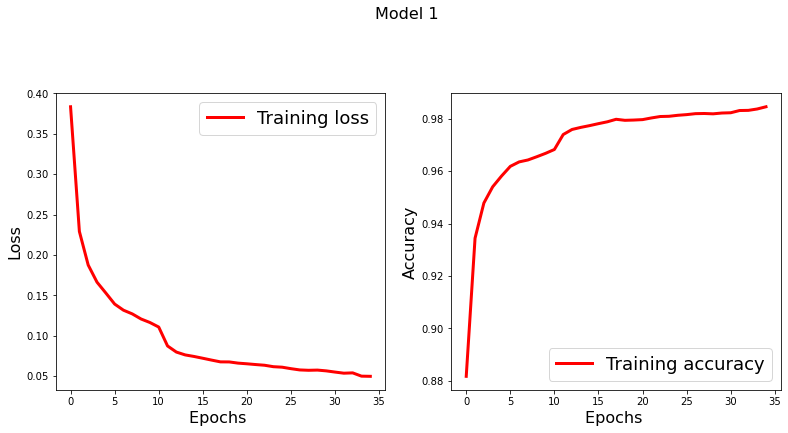

In [35]:
loss = history1.history['loss'] #+ history2.history['loss'] + history3.history['loss'] 
accuracy = history1.history['acc']# + history2.history['acc'] + history3.history['acc']

plt.figure(figsize=(13,12))
plt.suptitle("Model 1",fontsize=16)

plt.subplot(2,2,1)
plt.plot(loss,'r',linewidth=3.0)
plt.legend(['Training loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)  

plt.subplot(2,2,2)
plt.plot(accuracy,'r',linewidth=3.0) 
plt.legend(['Training accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16)

Normalized confusion matrix
[[9.94039077e-01 3.25643007e-03 1.93178055e-03 1.65581190e-04
  6.07131030e-04]
 [2.21223022e-01 7.55395683e-01 2.15827338e-02 0.00000000e+00
  1.79856115e-03]
 [6.28453039e-02 5.52486188e-03 9.12983425e-01 1.72651934e-02
  1.38121547e-03]
 [1.97530864e-01 6.17283951e-03 1.11111111e-01 6.85185185e-01
  0.00000000e+00]
 [2.86069652e-02 0.00000000e+00 2.48756219e-03 0.00000000e+00
  9.68905473e-01]]


<Figure size 432x288 with 0 Axes>

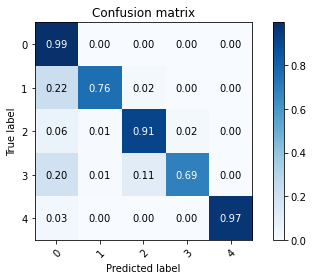

In [36]:
cnf_matrix = confusion_matrix(Y_test, pred_test)
class_names = [str(i) for i in range(5)]

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True)
plt.show()

# Model 2

In [37]:
model2 = get_model2()
file_path = "model2_cnn_mitbih.h5"
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor="val_acc", mode="max", patience=5, verbose=1)
redonplat = ReduceLROnPlateau(monitor="val_acc", mode="max", patience=3, verbose=2)
callbacks_list = [checkpoint, early, redonplat]  # early

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 187, 1)]          0         
_________________________________________________________________
conv1d_36 (Conv1D)           (None, 183, 16)           96        
_________________________________________________________________
conv1d_37 (Conv1D)           (None, 179, 16)           1296      
_________________________________________________________________
conv1d_38 (Conv1D)           (None, 175, 16)           1296      
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 87, 16)            0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 87, 16)            0         
_________________________________________________________________
conv1d_39 (Conv1D)           (None, 84, 32)            2080

In [38]:
history2 = model2.fit(X, Y, epochs=1000, verbose=2, callbacks=callbacks_list, validation_split=0.1)
model2.load_weights(file_path)

Train on 78798 samples, validate on 8756 samples
Epoch 1/1000

Epoch 00001: val_acc improved from -inf to 0.91252, saving model to model2_cnn_mitbih.h5
78798/78798 - 67s - loss: 0.4104 - acc: 0.8636 - val_loss: 0.2709 - val_acc: 0.9125
Epoch 2/1000

Epoch 00002: val_acc improved from 0.91252 to 0.93227, saving model to model2_cnn_mitbih.h5
78798/78798 - 26131s - loss: 0.2641 - acc: 0.9209 - val_loss: 0.2156 - val_acc: 0.9323
Epoch 3/1000

Epoch 00003: val_acc improved from 0.93227 to 0.94084, saving model to model2_cnn_mitbih.h5
78798/78798 - 62s - loss: 0.2203 - acc: 0.9335 - val_loss: 0.1885 - val_acc: 0.9408
Epoch 4/1000

Epoch 00004: val_acc improved from 0.94084 to 0.95420, saving model to model2_cnn_mitbih.h5
78798/78798 - 62s - loss: 0.1925 - acc: 0.9439 - val_loss: 0.1601 - val_acc: 0.9542
Epoch 5/1000

Epoch 00005: val_acc improved from 0.95420 to 0.95660, saving model to model2_cnn_mitbih.h5
78798/78798 - 62s - loss: 0.1754 - acc: 0.9498 - val_loss: 0.1499 - val_acc: 0.9566
E

Epoch 47/1000

Epoch 00047: val_acc did not improve from 0.98150
78798/78798 - 43s - loss: 0.0580 - acc: 0.9814 - val_loss: 0.0666 - val_acc: 0.9810
Epoch 48/1000

Epoch 00048: val_acc did not improve from 0.98150
78798/78798 - 43s - loss: 0.0589 - acc: 0.9815 - val_loss: 0.0666 - val_acc: 0.9810
Epoch 00048: early stopping


In [39]:
pred_test = model2.predict(X_test)
pred_test = np.argmax(pred_test, axis=-1)

f1 = f1_score(Y_test, pred_test, average="macro")

print("Test f1 score : %s "% f1)

acc = accuracy_score(Y_test, pred_test)

print("Test accuracy score : %s "% acc)

Test f1 score : 0.874913049863207 
Test accuracy score : 0.9761099945185456 


Text(0, 0.5, 'Accuracy')

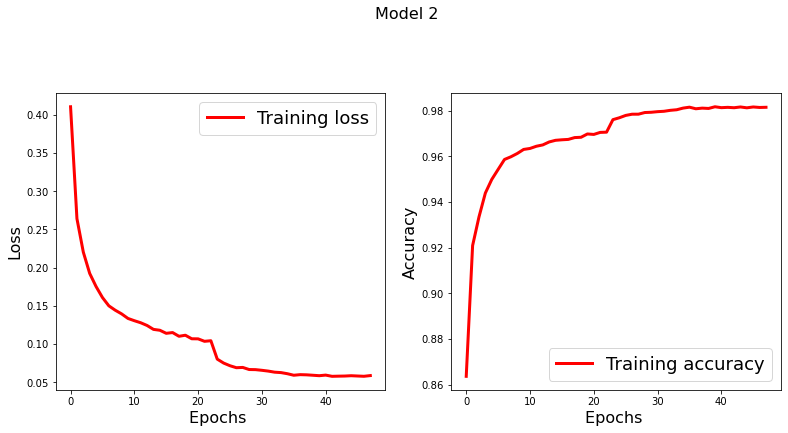

In [40]:
loss = history2.history['loss'] #+ history2.history['loss'] + history3.history['loss'] 
accuracy = history2.history['acc']# + history2.history['acc'] + history3.history['acc']

plt.figure(figsize=(13,12))
plt.suptitle("Model 2",fontsize=16)

plt.subplot(2,2,1)
plt.plot(loss,'r',linewidth=3.0)
plt.legend(['Training loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)  

plt.subplot(2,2,2)
plt.plot(accuracy,'r',linewidth=3.0) 
plt.legend(['Training accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16)

Normalized confusion matrix
[[9.93983883e-01 2.37333039e-03 2.31813666e-03 3.31162380e-04
  9.93487140e-04]
 [2.64388489e-01 7.05035971e-01 2.87769784e-02 1.79856115e-03
  0.00000000e+00]
 [7.18232044e-02 3.45303867e-03 9.08839779e-01 1.24309392e-02
  3.45303867e-03]
 [2.22222222e-01 0.00000000e+00 1.54320988e-01 6.23456790e-01
  0.00000000e+00]
 [3.35820896e-02 0.00000000e+00 1.86567164e-03 0.00000000e+00
  9.64552239e-01]]


<Figure size 432x288 with 0 Axes>

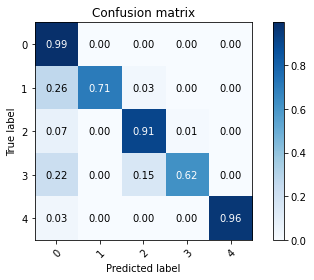

In [41]:
cnf_matrix = confusion_matrix(Y_test, pred_test)
class_names = [str(i) for i in range(5)]

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True)
plt.show()

# Model 3

In [42]:
model3 = get_model3()
file_path = "model3_cnn_mitbih.h5"
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor="val_acc", mode="max", patience=5, verbose=1)
redonplat = ReduceLROnPlateau(monitor="val_acc", mode="max", patience=3, verbose=2)
callbacks_list = [checkpoint, early, redonplat]  # early

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 187, 1)]          0         
_________________________________________________________________
conv1d_50 (Conv1D)           (None, 183, 16)           96        
_________________________________________________________________
conv1d_51 (Conv1D)           (None, 179, 16)           1296      
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 89, 16)            0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 89, 16)            0         
_________________________________________________________________
conv1d_52 (Conv1D)           (None, 87, 32)            1568      
_________________________________________________________________
conv1d_53 (Conv1D)           (None, 85, 32)            3104

In [43]:
history3 = model3.fit(X, Y, epochs=1000, verbose=2, callbacks=callbacks_list, validation_split=0.1)
model3.load_weights(file_path)

Train on 78798 samples, validate on 8756 samples
Epoch 1/1000

Epoch 00001: val_acc improved from -inf to 0.89447, saving model to model3_cnn_mitbih.h5
78798/78798 - 42s - loss: 0.4188 - acc: 0.8664 - val_loss: 0.3616 - val_acc: 0.8945
Epoch 2/1000

Epoch 00002: val_acc improved from 0.89447 to 0.93159, saving model to model3_cnn_mitbih.h5
78798/78798 - 41s - loss: 0.2379 - acc: 0.9288 - val_loss: 0.2144 - val_acc: 0.9316
Epoch 3/1000

Epoch 00003: val_acc improved from 0.93159 to 0.95740, saving model to model3_cnn_mitbih.h5
78798/78798 - 41s - loss: 0.1872 - acc: 0.9423 - val_loss: 0.1508 - val_acc: 0.9574
Epoch 4/1000

Epoch 00004: val_acc improved from 0.95740 to 0.96722, saving model to model3_cnn_mitbih.h5
78798/78798 - 42s - loss: 0.1581 - acc: 0.9558 - val_loss: 0.1305 - val_acc: 0.9672
Epoch 5/1000

Epoch 00005: val_acc did not improve from 0.96722
78798/78798 - 42s - loss: 0.1392 - acc: 0.9616 - val_loss: 0.1144 - val_acc: 0.9671
Epoch 6/1000

Epoch 00006: val_acc did not imp

In [44]:
pred_test = model3.predict(X_test)
pred_test = np.argmax(pred_test, axis=-1)

f1 = f1_score(Y_test, pred_test, average="macro")

print("Test f1 score : %s "% f1)

acc = accuracy_score(Y_test, pred_test)

print("Test accuracy score : %s "% acc)

Test f1 score : 0.9053612963747432 
Test accuracy score : 0.982093915585602 


Text(0, 0.5, 'Accuracy')

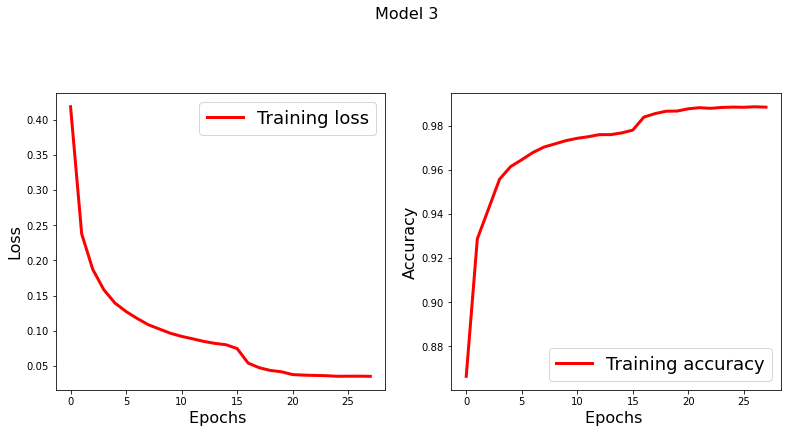

In [45]:
loss = history3.history['loss'] #+ history2.history['loss'] + history3.history['loss'] 
accuracy = history3.history['acc']# + history2.history['acc'] + history3.history['acc']

plt.figure(figsize=(13,12))
plt.suptitle("Model 3",fontsize=16)

plt.subplot(2,2,1)
plt.plot(loss,'r',linewidth=3.0)
plt.legend(['Training loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)  

plt.subplot(2,2,2)
plt.plot(accuracy,'r',linewidth=3.0) 
plt.legend(['Training accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16)

Normalized confusion matrix
[[9.95142952e-01 2.70449277e-03 1.10387460e-03 2.20774920e-04
  8.27905950e-04]
 [2.28417266e-01 7.53597122e-01 1.61870504e-02 1.79856115e-03
  0.00000000e+00]
 [4.07458564e-02 2.76243094e-03 9.44751381e-01 1.03591160e-02
  1.38121547e-03]
 [1.54320988e-01 0.00000000e+00 1.17283951e-01 7.28395062e-01
  0.00000000e+00]
 [2.23880597e-02 0.00000000e+00 4.35323383e-03 0.00000000e+00
  9.73258706e-01]]


<Figure size 432x288 with 0 Axes>

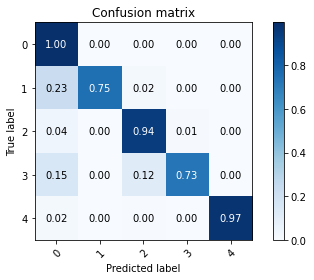

In [46]:
cnf_matrix = confusion_matrix(Y_test, pred_test)
class_names = [str(i) for i in range(5)]

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True)
plt.show()

# Model 4

In [47]:
model4 = get_model4()
file_path = "model4_cnn_mitbih.h5"
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor="val_acc", mode="max", patience=5, verbose=1)
redonplat = ReduceLROnPlateau(monitor="val_acc", mode="max", patience=3, verbose=2)
callbacks_list = [checkpoint, early, redonplat]  # early

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 187, 1)]          0         
_________________________________________________________________
conv1d_61 (Conv1D)           (None, 183, 16)           96        
_________________________________________________________________
conv1d_62 (Conv1D)           (None, 179, 16)           1296      
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 89, 16)            0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 89, 16)            0         
_________________________________________________________________
conv1d_63 (Conv1D)           (None, 87, 32)            1568      
_________________________________________________________________
conv1d_64 (Conv1D)           (None, 85, 32)            3104

In [48]:
history4 = model4.fit(X, Y, epochs=1000, verbose=2, callbacks=callbacks_list, validation_split=0.1)
model4.load_weights(file_path)

Train on 78798 samples, validate on 8756 samples
Epoch 1/1000

Epoch 00001: val_acc improved from -inf to 0.88990, saving model to model4_cnn_mitbih.h5
78798/78798 - 75s - loss: 0.4635 - acc: 0.8471 - val_loss: 0.3345 - val_acc: 0.8899
Epoch 2/1000

Epoch 00002: val_acc improved from 0.88990 to 0.93821, saving model to model4_cnn_mitbih.h5
78798/78798 - 75s - loss: 0.3054 - acc: 0.9095 - val_loss: 0.2346 - val_acc: 0.9382
Epoch 3/1000

Epoch 00003: val_acc improved from 0.93821 to 0.94781, saving model to model4_cnn_mitbih.h5
78798/78798 - 74s - loss: 0.2295 - acc: 0.9346 - val_loss: 0.1758 - val_acc: 0.9478
Epoch 4/1000

Epoch 00004: val_acc improved from 0.94781 to 0.95569, saving model to model4_cnn_mitbih.h5
78798/78798 - 74s - loss: 0.2008 - acc: 0.9410 - val_loss: 0.1555 - val_acc: 0.9557
Epoch 5/1000

Epoch 00005: val_acc improved from 0.95569 to 0.96037, saving model to model4_cnn_mitbih.h5
78798/78798 - 74s - loss: 0.1801 - acc: 0.9499 - val_loss: 0.1400 - val_acc: 0.9604
Epoc

In [49]:
pred_test = model4.predict(X_test)
pred_test = np.argmax(pred_test, axis=-1)

f1 = f1_score(Y_test, pred_test, average="macro")

print("Test f1 score : %s "% f1)

acc = accuracy_score(Y_test, pred_test)

print("Test accuracy score : %s "% acc)

Test f1 score : 0.890522308333779 
Test accuracy score : 0.9771606066142883 


Text(0, 0.5, 'Accuracy')

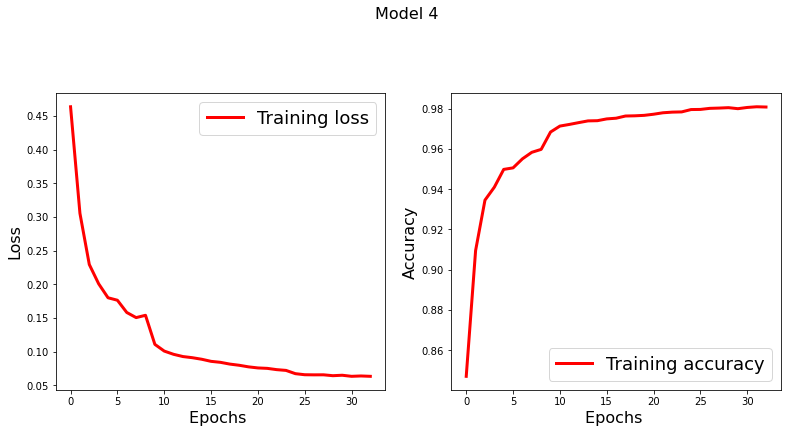

In [50]:
loss = history4.history['loss'] #+ history2.history['loss'] + history3.history['loss'] 
accuracy = history4.history['acc']# + history2.history['acc'] + history3.history['acc']

plt.figure(figsize=(13,12))
plt.suptitle("Model 4",fontsize=16)

plt.subplot(2,2,1)
plt.plot(loss,'r',linewidth=3.0)
plt.legend(['Training loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)  

plt.subplot(2,2,2)
plt.plot(accuracy,'r',linewidth=3.0) 
plt.legend(['Training accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16)

Normalized confusion matrix
[[9.95087758e-01 1.93178055e-03 1.49023071e-03 4.41549840e-04
  1.04868087e-03]
 [2.94964029e-01 6.67266187e-01 3.23741007e-02 0.00000000e+00
  5.39568345e-03]
 [6.62983425e-02 3.45303867e-03 9.19198895e-01 8.97790055e-03
  2.07182320e-03]
 [1.60493827e-01 0.00000000e+00 9.87654321e-02 7.40740741e-01
  0.00000000e+00]
 [3.54477612e-02 0.00000000e+00 6.21890547e-03 0.00000000e+00
  9.58333333e-01]]


<Figure size 432x288 with 0 Axes>

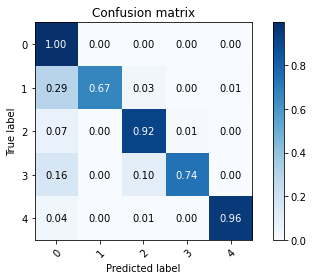

In [51]:
cnf_matrix = confusion_matrix(Y_test, pred_test)
class_names = [str(i) for i in range(5)]

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True)
plt.show()

# Model 5

In [52]:
model5 = get_model5()
file_path = "model5_cnn_mitbih.h5"
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor="val_acc", mode="max", patience=5, verbose=1)
redonplat = ReduceLROnPlateau(monitor="val_acc", mode="max", patience=3, verbose=2)
callbacks_list = [checkpoint, early, redonplat]  # early

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 187, 1)]          0         
_________________________________________________________________
conv1d_75 (Conv1D)           (None, 183, 16)           96        
_________________________________________________________________
conv1d_76 (Conv1D)           (None, 179, 16)           1296      
_________________________________________________________________
conv1d_77 (Conv1D)           (None, 177, 16)           784       
_________________________________________________________________
conv1d_78 (Conv1D)           (None, 175, 16)           784       
_________________________________________________________________
conv1d_79 (Conv1D)           (None, 173, 16)           784       
_________________________________________________________________
max_pooling1d_17 (MaxPooling (None, 86, 16)            0   

In [53]:
history5 = model5.fit(X, Y, epochs=1000, verbose=2, callbacks=callbacks_list, validation_split=0.1)
model5.load_weights(file_path)

Train on 78798 samples, validate on 8756 samples
Epoch 1/1000

Epoch 00001: val_acc improved from -inf to 0.85062, saving model to model5_cnn_mitbih.h5
78798/78798 - 74s - loss: 0.4726 - acc: 0.8351 - val_loss: 0.4217 - val_acc: 0.8506
Epoch 2/1000

Epoch 00002: val_acc did not improve from 0.85062
78798/78798 - 71s - loss: 0.5646 - acc: 0.8340 - val_loss: 0.4276 - val_acc: 0.8392
Epoch 3/1000

Epoch 00003: val_acc improved from 0.85062 to 0.87825, saving model to model5_cnn_mitbih.h5
78798/78798 - 71s - loss: 0.4016 - acc: 0.8594 - val_loss: 0.3745 - val_acc: 0.8783
Epoch 4/1000

Epoch 00004: val_acc improved from 0.87825 to 0.90955, saving model to model5_cnn_mitbih.h5
78798/78798 - 71s - loss: 0.3143 - acc: 0.9058 - val_loss: 0.2966 - val_acc: 0.9095
Epoch 5/1000

Epoch 00005: val_acc did not improve from 0.90955
78798/78798 - 71s - loss: 0.2679 - acc: 0.9216 - val_loss: 0.3638 - val_acc: 0.8866
Epoch 6/1000

Epoch 00006: val_acc improved from 0.90955 to 0.93216, saving model to mod

In [54]:
pred_test = model5.predict(X_test)
pred_test = np.argmax(pred_test, axis=-1)

f1 = f1_score(Y_test, pred_test, average="macro")

print("Test f1 score : %s "% f1)

acc = accuracy_score(Y_test, pred_test)

print("Test accuracy score : %s "% acc)

Test f1 score : 0.8548147155527539 
Test accuracy score : 0.9725013703636032 


Text(0, 0.5, 'Accuracy')

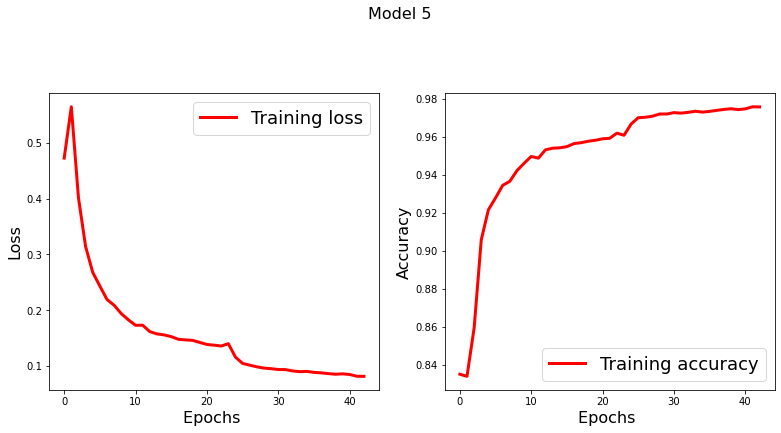

In [55]:
loss = history5.history['loss'] #+ history2.history['loss'] + history3.history['loss'] 
accuracy = history5.history['acc']# + history2.history['acc'] + history3.history['acc']

plt.figure(figsize=(13,12))
plt.suptitle("Model 5",fontsize=16)

plt.subplot(2,2,1)
plt.plot(loss,'r',linewidth=3.0)
plt.legend(['Training loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)  

plt.subplot(2,2,2)
plt.plot(accuracy,'r',linewidth=3.0) 
plt.legend(['Training accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16)

Normalized confusion matrix
[[9.94701402e-01 1.37984325e-03 2.26294293e-03 2.75968650e-04
  1.37984325e-03]
 [3.39928058e-01 6.29496403e-01 2.69784173e-02 1.79856115e-03
  1.79856115e-03]
 [9.59944751e-02 4.14364641e-03 8.82596685e-01 1.17403315e-02
  5.52486188e-03]
 [3.08641975e-01 0.00000000e+00 1.23456790e-01 5.61728395e-01
  6.17283951e-03]
 [3.54477612e-02 0.00000000e+00 1.24378109e-03 0.00000000e+00
  9.63308458e-01]]


<Figure size 432x288 with 0 Axes>

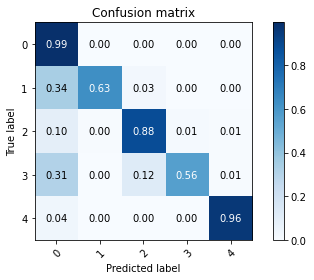

In [56]:
cnf_matrix = confusion_matrix(Y_test, pred_test)
class_names = [str(i) for i in range(5)]

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True)
plt.show()

# Model 6

In [57]:
model6 = get_model6()
file_path = "model6_cnn_mitbih.h5"
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor="val_acc", mode="max", patience=5, verbose=1)
redonplat = ReduceLROnPlateau(monitor="val_acc", mode="max", patience=3, verbose=2)
callbacks_list = [checkpoint, early, redonplat]  # early

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 187, 1)]          0         
_________________________________________________________________
conv1d_95 (Conv1D)           (None, 183, 16)           96        
_________________________________________________________________
conv1d_96 (Conv1D)           (None, 179, 16)           1296      
_________________________________________________________________
max_pooling1d_19 (MaxPooling (None, 89, 16)            0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 89, 16)            0         
_________________________________________________________________
conv1d_97 (Conv1D)           (None, 87, 32)            1568      
_________________________________________________________________
conv1d_98 (Conv1D)           (None, 85, 32)            3104

In [58]:
history6 = model6.fit(X, Y, epochs=1000, verbose=2, callbacks=callbacks_list, validation_split=0.1)
model6.load_weights(file_path)

Train on 78798 samples, validate on 8756 samples
Epoch 1/1000

Epoch 00001: val_acc improved from -inf to 0.93250, saving model to model6_cnn_mitbih.h5
78798/78798 - 32s - loss: 0.3360 - acc: 0.9025 - val_loss: 0.2011 - val_acc: 0.9325
Epoch 2/1000

Epoch 00002: val_acc improved from 0.93250 to 0.96083, saving model to model6_cnn_mitbih.h5
78798/78798 - 29s - loss: 0.1954 - acc: 0.9435 - val_loss: 0.1368 - val_acc: 0.9608
Epoch 3/1000

Epoch 00003: val_acc improved from 0.96083 to 0.97042, saving model to model6_cnn_mitbih.h5
78798/78798 - 29s - loss: 0.1540 - acc: 0.9576 - val_loss: 0.1053 - val_acc: 0.9704
Epoch 4/1000

Epoch 00004: val_acc improved from 0.97042 to 0.97476, saving model to model6_cnn_mitbih.h5
78798/78798 - 29s - loss: 0.1331 - acc: 0.9635 - val_loss: 0.0958 - val_acc: 0.9748
Epoch 5/1000

Epoch 00005: val_acc improved from 0.97476 to 0.97807, saving model to model6_cnn_mitbih.h5
78798/78798 - 30s - loss: 0.1220 - acc: 0.9664 - val_loss: 0.0901 - val_acc: 0.9781
Epoc

In [59]:
pred_test = model6.predict(X_test)
pred_test = np.argmax(pred_test, axis=-1)

f1 = f1_score(Y_test, pred_test, average="macro")

print("Test f1 score : %s "% f1)

acc = accuracy_score(Y_test, pred_test)

print("Test accuracy score : %s "% acc)

Test f1 score : 0.9108221228595529 
Test accuracy score : 0.9845605700712589 


Text(0, 0.5, 'Accuracy')

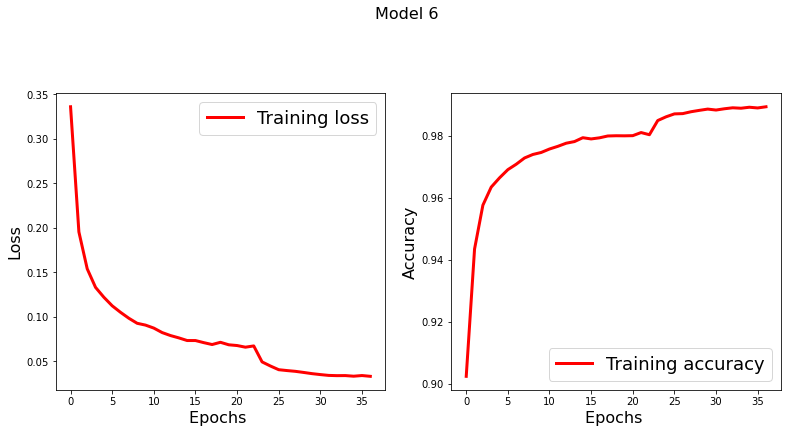

In [60]:
loss = history6.history['loss'] #+ history2.history['loss'] + history3.history['loss'] 
accuracy = history6.history['acc']# + history2.history['acc'] + history3.history['acc']

plt.figure(figsize=(13,12))
plt.suptitle("Model 6",fontsize=16)

plt.subplot(2,2,1)
plt.plot(loss,'r',linewidth=3.0)
plt.legend(['Training loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)  

plt.subplot(2,2,2)
plt.plot(accuracy,'r',linewidth=3.0) 
plt.legend(['Training accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16)

Normalized confusion matrix
[[9.95253339e-01 2.26294293e-03 1.87658682e-03 3.31162380e-04
  2.75968650e-04]
 [1.79856115e-01 7.87769784e-01 2.69784173e-02 0.00000000e+00
  5.39568345e-03]
 [3.17679558e-02 2.76243094e-03 9.52348066e-01 9.66850829e-03
  3.45303867e-03]
 [1.35802469e-01 6.17283951e-03 1.41975309e-01 7.16049383e-01
  0.00000000e+00]
 [1.05721393e-02 0.00000000e+00 1.24378109e-03 0.00000000e+00
  9.88184080e-01]]


<Figure size 432x288 with 0 Axes>

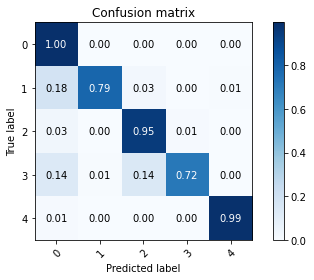

In [61]:
cnf_matrix = confusion_matrix(Y_test, pred_test)
class_names = [str(i) for i in range(5)]

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True)
plt.show()

# Model 7

In [62]:
model7 = get_model7()
file_path = "model7_cnn_mitbih.h5"
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor="val_acc", mode="max", patience=5, verbose=1)
redonplat = ReduceLROnPlateau(monitor="val_acc", mode="max", patience=3, verbose=2)
callbacks_list = [checkpoint, early, redonplat]  # early

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 187, 1)]          0         
_________________________________________________________________
conv1d_105 (Conv1D)          (None, 183, 16)           96        
_________________________________________________________________
conv1d_106 (Conv1D)          (None, 179, 16)           1296      
_________________________________________________________________
conv1d_107 (Conv1D)          (None, 175, 16)           1296      
_________________________________________________________________
max_pooling1d_23 (MaxPooling (None, 87, 16)            0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 87, 16)            0         
_________________________________________________________________
conv1d_108 (Conv1D)          (None, 85, 32)            1568

In [63]:
history7 = model7.fit(X, Y, epochs=1000, verbose=2, callbacks=callbacks_list, validation_split=0.1)
model7.load_weights(file_path)

Train on 78798 samples, validate on 8756 samples
Epoch 1/1000

Epoch 00001: val_acc improved from -inf to 0.92245, saving model to model7_cnn_mitbih.h5
78798/78798 - 40s - loss: 0.3984 - acc: 0.8815 - val_loss: 0.2598 - val_acc: 0.9225
Epoch 2/1000

Epoch 00002: val_acc improved from 0.92245 to 0.92953, saving model to model7_cnn_mitbih.h5
78798/78798 - 36s - loss: 0.2670 - acc: 0.9201 - val_loss: 0.2180 - val_acc: 0.9295
Epoch 3/1000

Epoch 00003: val_acc improved from 0.92953 to 0.94175, saving model to model7_cnn_mitbih.h5
78798/78798 - 37s - loss: 0.2316 - acc: 0.9320 - val_loss: 0.1898 - val_acc: 0.9418
Epoch 4/1000

Epoch 00004: val_acc did not improve from 0.94175
78798/78798 - 37s - loss: 0.2138 - acc: 0.9377 - val_loss: 0.2025 - val_acc: 0.9350
Epoch 5/1000

Epoch 00005: val_acc improved from 0.94175 to 0.95055, saving model to model7_cnn_mitbih.h5
78798/78798 - 37s - loss: 0.1999 - acc: 0.9406 - val_loss: 0.1715 - val_acc: 0.9505
Epoch 6/1000

Epoch 00006: val_acc improved fr

In [64]:
pred_test = model7.predict(X_test)
pred_test = np.argmax(pred_test, axis=-1)

f1 = f1_score(Y_test, pred_test, average="macro")

print("Test f1 score : %s "% f1)

acc = accuracy_score(Y_test, pred_test)

print("Test accuracy score : %s "% acc)

Test f1 score : 0.8540598879903154 
Test accuracy score : 0.9694865704366892 


Text(0, 0.5, 'Accuracy')

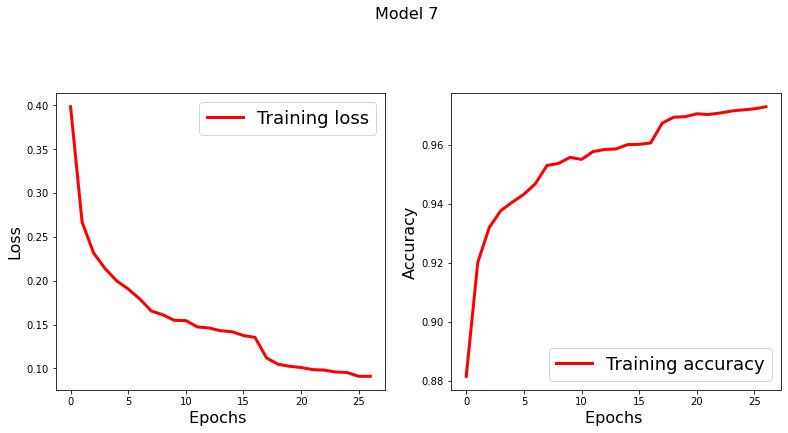

In [65]:
loss = history7.history['loss'] #+ history2.history['loss'] + history3.history['loss'] 
accuracy = history7.history['acc']# + history2.history['acc'] + history3.history['acc']

plt.figure(figsize=(13,12))
plt.suptitle("Model 7",fontsize=16)

plt.subplot(2,2,1)
plt.plot(loss,'r',linewidth=3.0)
plt.legend(['Training loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)  

plt.subplot(2,2,2)
plt.plot(accuracy,'r',linewidth=3.0) 
plt.legend(['Training accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16)

Normalized confusion matrix
[[9.91500166e-01 2.81488023e-03 3.86356110e-03 6.07131030e-04
  1.21426206e-03]
 [3.68705036e-01 6.04316547e-01 2.51798561e-02 0.00000000e+00
  1.79856115e-03]
 [1.01519337e-01 8.28729282e-03 8.72928177e-01 1.58839779e-02
  1.38121547e-03]
 [1.85185185e-01 0.00000000e+00 1.41975309e-01 6.72839506e-01
  0.00000000e+00]
 [2.92288557e-02 0.00000000e+00 6.21890547e-03 0.00000000e+00
  9.64552239e-01]]


<Figure size 432x288 with 0 Axes>

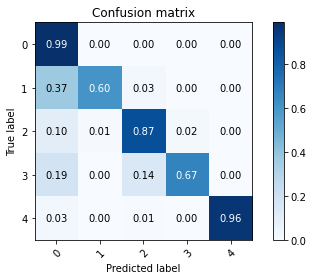

In [66]:
cnf_matrix = confusion_matrix(Y_test, pred_test)
class_names = [str(i) for i in range(5)]

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True)
plt.show()

# Model 8

In [67]:
model8 = get_model8()
file_path = "model8_cnn_mitbih.h5"
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor="val_acc", mode="max", patience=5, verbose=1)
redonplat = ReduceLROnPlateau(monitor="val_acc", mode="max", patience=3, verbose=2)
callbacks_list = [checkpoint, early, redonplat]  # early

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 187, 1)]          0         
_________________________________________________________________
conv1d_120 (Conv1D)          (None, 183, 16)           96        
_________________________________________________________________
conv1d_121 (Conv1D)          (None, 179, 16)           1296      
_________________________________________________________________
conv1d_122 (Conv1D)          (None, 175, 32)           2592      
_________________________________________________________________
conv1d_123 (Conv1D)          (None, 171, 32)           5152      
_________________________________________________________________
max_pooling1d_27 (MaxPooling (None, 85, 32)            0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 85, 32)            0   

In [68]:
history8 = model8.fit(X, Y, epochs=1000, verbose=2, callbacks=callbacks_list, validation_split=0.1)
model8.load_weights(file_path)

Train on 78798 samples, validate on 8756 samples
Epoch 1/1000

Epoch 00001: val_acc improved from -inf to 0.88842, saving model to model8_cnn_mitbih.h5
78798/78798 - 81s - loss: 0.4319 - acc: 0.8566 - val_loss: 0.3484 - val_acc: 0.8884
Epoch 2/1000

Epoch 00002: val_acc improved from 0.88842 to 0.92759, saving model to model8_cnn_mitbih.h5
78798/78798 - 77s - loss: 0.3200 - acc: 0.9017 - val_loss: 0.2378 - val_acc: 0.9276
Epoch 3/1000

Epoch 00003: val_acc improved from 0.92759 to 0.93616, saving model to model8_cnn_mitbih.h5
78798/78798 - 77s - loss: 0.2414 - acc: 0.9281 - val_loss: 0.2189 - val_acc: 0.9362
Epoch 4/1000

Epoch 00004: val_acc improved from 0.93616 to 0.94701, saving model to model8_cnn_mitbih.h5
78798/78798 - 77s - loss: 0.2164 - acc: 0.9373 - val_loss: 0.1848 - val_acc: 0.9470
Epoch 5/1000

Epoch 00005: val_acc improved from 0.94701 to 0.95112, saving model to model8_cnn_mitbih.h5
78798/78798 - 443s - loss: 0.1976 - acc: 0.9419 - val_loss: 0.1776 - val_acc: 0.9511
Epo

In [69]:
pred_test = model8.predict(X_test)
pred_test = np.argmax(pred_test, axis=-1)

f1 = f1_score(Y_test, pred_test, average="macro")

print("Test f1 score : %s "% f1)

acc = accuracy_score(Y_test, pred_test)

print("Test accuracy score : %s "% acc)

Test f1 score : 0.8929593076734875 
Test accuracy score : 0.9772976429746026 


Text(0, 0.5, 'Accuracy')

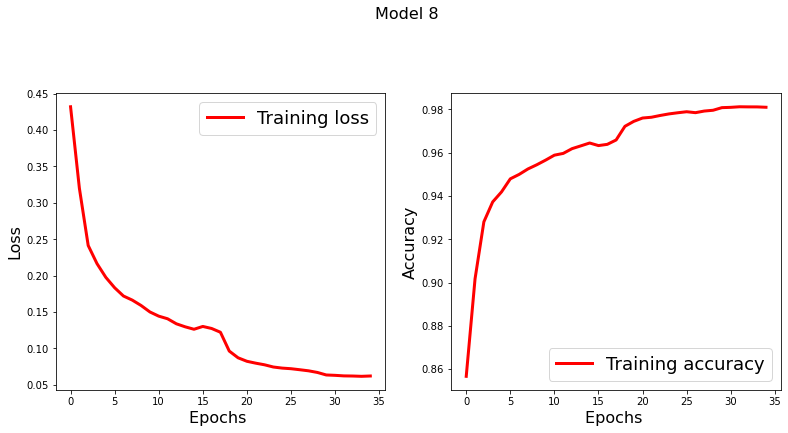

In [70]:
loss = history8.history['loss'] #+ history2.history['loss'] + history3.history['loss'] 
accuracy = history8.history['acc']# + history2.history['acc'] + history3.history['acc']

plt.figure(figsize=(13,12))
plt.suptitle("Model 8",fontsize=16)

plt.subplot(2,2,1)
plt.plot(loss,'r',linewidth=3.0)
plt.legend(['Training loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)  

plt.subplot(2,2,2)
plt.plot(accuracy,'r',linewidth=3.0) 
plt.legend(['Training accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16)

Normalized confusion matrix
[[9.94866983e-01 2.04216801e-03 1.71100563e-03 3.86356110e-04
  9.93487140e-04]
 [2.76978417e-01 6.92446043e-01 3.05755396e-02 0.00000000e+00
  0.00000000e+00]
 [7.11325967e-02 4.83425414e-03 9.11602210e-01 9.66850829e-03
  2.76243094e-03]
 [1.48148148e-01 0.00000000e+00 1.11111111e-01 7.40740741e-01
  0.00000000e+00]
 [3.54477612e-02 0.00000000e+00 3.73134328e-03 0.00000000e+00
  9.60820896e-01]]


<Figure size 432x288 with 0 Axes>

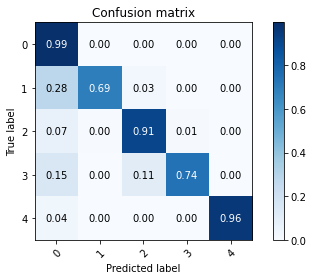

In [71]:
cnf_matrix = confusion_matrix(Y_test, pred_test)
class_names = [str(i) for i in range(5)]

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True)
plt.show()

# Model 9

In [72]:
model9 = get_model9()
file_path = "model9_cnn_mitbih.h5"
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor="val_acc", mode="max", patience=5, verbose=1)
redonplat = ReduceLROnPlateau(monitor="val_acc", mode="max", patience=3, verbose=2)
callbacks_list = [checkpoint, early, redonplat]  # early

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 187, 1)]          0         
_________________________________________________________________
conv1d_136 (Conv1D)          (None, 183, 16)           96        
_________________________________________________________________
conv1d_137 (Conv1D)          (None, 179, 16)           1296      
_________________________________________________________________
conv1d_138 (Conv1D)          (None, 176, 16)           1040      
_________________________________________________________________
conv1d_139 (Conv1D)          (None, 173, 16)           1040      
_________________________________________________________________
max_pooling1d_29 (MaxPooling (None, 86, 16)            0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 86, 16)            0  

In [73]:
history9 = model9.fit(X, Y, epochs=1000, verbose=2, callbacks=callbacks_list, validation_split=0.1)
model9.load_weights(file_path)

Train on 78798 samples, validate on 8756 samples
Epoch 1/1000

Epoch 00001: val_acc improved from -inf to 0.91423, saving model to model9_cnn_mitbih.h5
78798/78798 - 59s - loss: 0.4305 - acc: 0.8699 - val_loss: 0.2793 - val_acc: 0.9142
Epoch 2/1000

Epoch 00002: val_acc improved from 0.91423 to 0.92828, saving model to model9_cnn_mitbih.h5
78798/78798 - 53s - loss: 0.2927 - acc: 0.9112 - val_loss: 0.2262 - val_acc: 0.9283
Epoch 3/1000

Epoch 00003: val_acc improved from 0.92828 to 0.93639, saving model to model9_cnn_mitbih.h5
78798/78798 - 54s - loss: 0.2538 - acc: 0.9257 - val_loss: 0.2087 - val_acc: 0.9364
Epoch 4/1000

Epoch 00004: val_acc did not improve from 0.93639
78798/78798 - 54s - loss: 0.2300 - acc: 0.9328 - val_loss: 0.2164 - val_acc: 0.9300
Epoch 5/1000

Epoch 00005: val_acc improved from 0.93639 to 0.94427, saving model to model9_cnn_mitbih.h5
78798/78798 - 54s - loss: 0.2242 - acc: 0.9349 - val_loss: 0.1861 - val_acc: 0.9443
Epoch 6/1000

Epoch 00006: val_acc improved fr

In [74]:
pred_test = model9.predict(X_test)
pred_test = np.argmax(pred_test, axis=-1)

f1 = f1_score(Y_test, pred_test, average="macro")

print("Test f1 score : %s "% f1)

acc = accuracy_score(Y_test, pred_test)

print("Test accuracy score : %s "% acc)

Test f1 score : 0.8098387768012006 
Test accuracy score : 0.9638680796638042 


Text(0, 0.5, 'Accuracy')

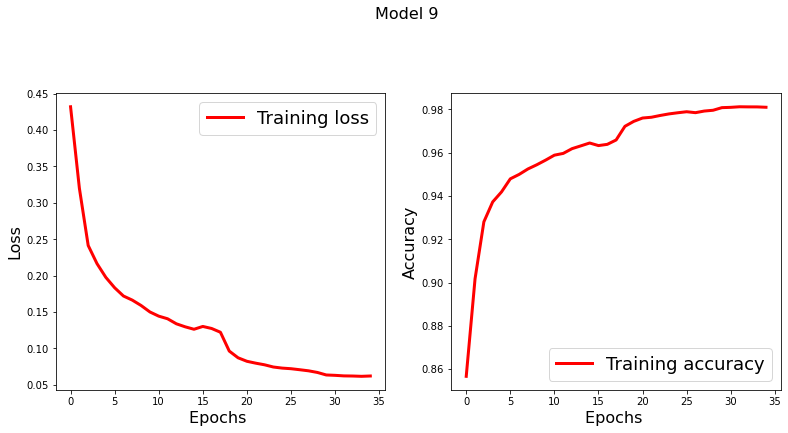

In [75]:
loss = history8.history['loss'] #+ history2.history['loss'] + history3.history['loss'] 
accuracy = history8.history['acc']# + history2.history['acc'] + history3.history['acc']

plt.figure(figsize=(13,12))
plt.suptitle("Model 9",fontsize=16)

plt.subplot(2,2,1)
plt.plot(loss,'r',linewidth=3.0)
plt.legend(['Training loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)  

plt.subplot(2,2,2)
plt.plot(accuracy,'r',linewidth=3.0) 
plt.legend(['Training accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16)

Normalized confusion matrix
[[9.90672260e-01 2.15255547e-03 4.85704824e-03 1.04868087e-03
  1.26945579e-03]
 [3.99280576e-01 5.73741007e-01 2.69784173e-02 0.00000000e+00
  0.00000000e+00]
 [1.11878453e-01 1.24309392e-02 8.55662983e-01 8.97790055e-03
  1.10497238e-02]
 [3.76543210e-01 0.00000000e+00 1.66666667e-01 4.56790123e-01
  0.00000000e+00]
 [4.10447761e-02 0.00000000e+00 1.30597015e-02 6.21890547e-04
  9.45273632e-01]]


<Figure size 432x288 with 0 Axes>

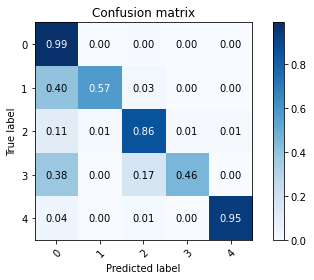

In [76]:
cnf_matrix = confusion_matrix(Y_test, pred_test)
class_names = [str(i) for i in range(5)]

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True)
plt.show()

# Model 10

In [77]:
model10 = get_model10()
file_path = "model10_cnn_mitbih.h5"
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor="val_acc", mode="max", patience=5, verbose=1)
redonplat = ReduceLROnPlateau(monitor="val_acc", mode="max", patience=3, verbose=2)
callbacks_list = [checkpoint, early, redonplat]  # early

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 187, 1)]          0         
_________________________________________________________________
conv1d_158 (Conv1D)          (None, 183, 16)           96        
_________________________________________________________________
conv1d_159 (Conv1D)          (None, 179, 16)           1296      
_________________________________________________________________
conv1d_160 (Conv1D)          (None, 175, 16)           1296      
_________________________________________________________________
conv1d_161 (Conv1D)          (None, 171, 16)           1296      
_________________________________________________________________
conv1d_162 (Conv1D)          (None, 168, 32)           2080      
_________________________________________________________________
conv1d_163 (Conv1D)          (None, 165, 32)           412

In [78]:
history10 = model10.fit(X, Y, epochs=1000, verbose=2, callbacks=callbacks_list, validation_split=0.1)
model10.load_weights(file_path)

Train on 78798 samples, validate on 8756 samples
Epoch 1/1000

Epoch 00001: val_acc improved from -inf to 0.82926, saving model to model10_cnn_mitbih.h5
78798/78798 - 100s - loss: 0.6719 - acc: 0.8272 - val_loss: 0.6607 - val_acc: 0.8293
Epoch 2/1000

Epoch 00002: val_acc did not improve from 0.82926
78798/78798 - 94s - loss: 0.6616 - acc: 0.8276 - val_loss: 0.6575 - val_acc: 0.8293
Epoch 3/1000

Epoch 00003: val_acc did not improve from 0.82926
78798/78798 - 95s - loss: 0.6604 - acc: 0.8276 - val_loss: 0.6546 - val_acc: 0.8293
Epoch 4/1000

Epoch 00004: val_acc did not improve from 0.82926

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
78798/78798 - 96s - loss: 0.6592 - acc: 0.8276 - val_loss: 0.6567 - val_acc: 0.8293
Epoch 5/1000

Epoch 00005: val_acc did not improve from 0.82926
78798/78798 - 94s - loss: 0.6579 - acc: 0.8276 - val_loss: 0.6548 - val_acc: 0.8293
Epoch 6/1000

Epoch 00006: val_acc did not improve from 0.82926
78798/78798 - 94s - loss

In [79]:
pred_test = model10.predict(X_test)
pred_test = np.argmax(pred_test, axis=-1)

f1 = f1_score(Y_test, pred_test, average="macro")

print("Test f1 score : %s "% f1)

acc = accuracy_score(Y_test, pred_test)

print("Test accuracy score : %s "% acc)

Test f1 score : 0.18113471632091976 
Test accuracy score : 0.8276082587246483 


Text(0, 0.5, 'Accuracy')

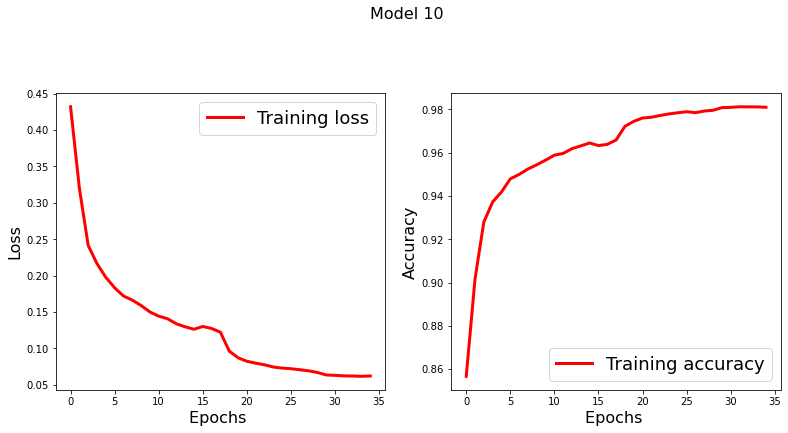

In [80]:
loss = history8.history['loss'] #+ history2.history['loss'] + history3.history['loss'] 
accuracy = history8.history['acc']# + history2.history['acc'] + history3.history['acc']

plt.figure(figsize=(13,12))
plt.suptitle("Model 10",fontsize=16)

plt.subplot(2,2,1)
plt.plot(loss,'r',linewidth=3.0)
plt.legend(['Training loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)  

plt.subplot(2,2,2)
plt.plot(accuracy,'r',linewidth=3.0) 
plt.legend(['Training accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16)

Normalized confusion matrix
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


<Figure size 432x288 with 0 Axes>

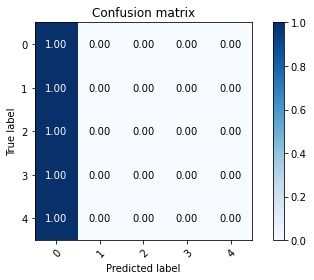

In [81]:
cnf_matrix = confusion_matrix(Y_test, pred_test)
class_names = [str(i) for i in range(5)]

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True)
plt.show()

# Baseline

In [85]:
def get_model():
    nclass = 5
    inp = Input(shape=(187, 1))
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(inp)
    img_1 = Convolution1D(16, kernel_size=5, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(32, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = MaxPool1D(pool_size=2)(img_1)
    img_1 = Dropout(rate=0.1)(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = Convolution1D(256, kernel_size=3, activation=activations.relu, padding="valid")(img_1)
    img_1 = GlobalMaxPool1D()(img_1)
    img_1 = Dropout(rate=0.2)(img_1)

    dense_1 = Dense(64, activation=activations.relu, name="dense_1")(img_1)
    dense_1 = Dense(64, activation=activations.relu, name="dense_2")(dense_1)
    dense_1 = Dense(nclass, activation=activations.sigmoid, name="dense_3_mitbih")(dense_1)

    model = models.Model(inputs=inp, outputs=dense_1)
    opt = optimizers.Adam(0.001)

    model.compile(optimizer=opt, loss=losses.sparse_categorical_crossentropy, metrics=['acc'])
    model.summary()
    return model

In [86]:
model = get_model()
file_path = "baseline_cnn_ptbdb.h5"
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor="val_acc", mode="max", patience=5, verbose=1)
redonplat = ReduceLROnPlateau(monitor="val_acc", mode="max", patience=3, verbose=2)
callbacks_list = [checkpoint, early, redonplat]  # early

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 187, 1)]          0         
_________________________________________________________________
conv1d_191 (Conv1D)          (None, 183, 16)           96        
_________________________________________________________________
conv1d_192 (Conv1D)          (None, 179, 16)           1296      
_________________________________________________________________
max_pooling1d_39 (MaxPooling (None, 89, 16)            0         
_________________________________________________________________
dropout_46 (Dropout)         (None, 89, 16)            0         
_________________________________________________________________
conv1d_193 (Conv1D)          (None, 87, 32)            1568      
_________________________________________________________________
conv1d_194 (Conv1D)          (None, 85, 32)            310

In [87]:
history = model.fit(X, Y, epochs=1000, verbose=2, callbacks=callbacks_list, validation_split=0.1)
model.load_weights(file_path)

Train on 78798 samples, validate on 8756 samples
Epoch 1/1000

Epoch 00001: val_acc improved from -inf to 0.92599, saving model to baseline_cnn_ptbdb.h5
78798/78798 - 38s - loss: 0.3876 - acc: 0.8828 - val_loss: 0.2496 - val_acc: 0.9260
Epoch 2/1000

Epoch 00002: val_acc improved from 0.92599 to 0.94415, saving model to baseline_cnn_ptbdb.h5
78798/78798 - 34s - loss: 0.2153 - acc: 0.9388 - val_loss: 0.1880 - val_acc: 0.9442
Epoch 3/1000

Epoch 00003: val_acc improved from 0.94415 to 0.96654, saving model to baseline_cnn_ptbdb.h5
78798/78798 - 35s - loss: 0.1645 - acc: 0.9547 - val_loss: 0.1260 - val_acc: 0.9665
Epoch 4/1000

Epoch 00004: val_acc improved from 0.96654 to 0.97602, saving model to baseline_cnn_ptbdb.h5
78798/78798 - 35s - loss: 0.1399 - acc: 0.9615 - val_loss: 0.1011 - val_acc: 0.9760
Epoch 5/1000

Epoch 00005: val_acc did not improve from 0.97602
78798/78798 - 34s - loss: 0.1262 - acc: 0.9656 - val_loss: 0.0993 - val_acc: 0.9743
Epoch 6/1000

Epoch 00006: val_acc did not

In [88]:
pred_test = model.predict(X_test)
pred_test = np.argmax(pred_test, axis=-1)

f1 = f1_score(Y_test, pred_test, average="macro")

print("Test f1 score : %s "% f1)

acc = accuracy_score(Y_test, pred_test)

print("Test accuracy score : %s "% acc)

Test f1 score : 0.9129834071019595 
Test accuracy score : 0.9845605700712589 


Text(0, 0.5, 'Accuracy')

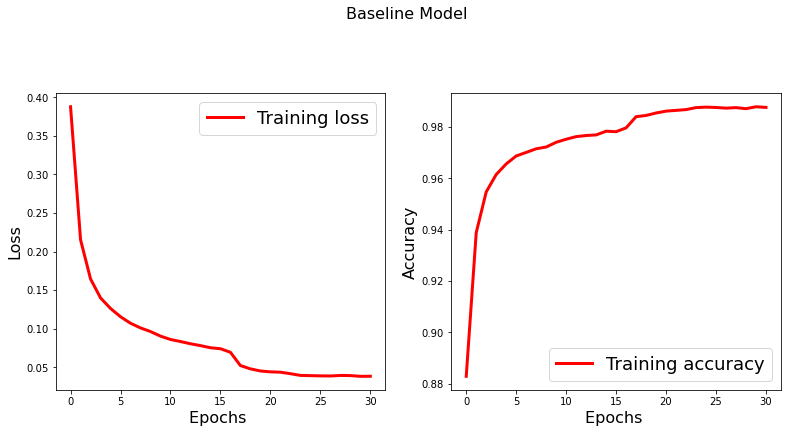

In [89]:
loss = history.history['loss'] #+ history2.history['loss'] + history3.history['loss'] 
accuracy = history.history['acc']# + history2.history['acc'] + history3.history['acc']

plt.figure(figsize=(13,12))
plt.suptitle("Baseline Model",fontsize=16)

plt.subplot(2,2,1)
plt.plot(loss,'r',linewidth=3.0)
plt.legend(['Training loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)  

plt.subplot(2,2,2)
plt.plot(accuracy,'r',linewidth=3.0) 
plt.legend(['Training accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16)

Normalized confusion matrix
[[9.95915664e-01 2.15255547e-03 1.26945579e-03 2.75968650e-04
  3.86356110e-04]
 [2.10431655e-01 7.69784173e-01 1.79856115e-02 0.00000000e+00
  1.79856115e-03]
 [3.38397790e-02 4.14364641e-03 9.48204420e-01 1.17403315e-02
  2.07182320e-03]
 [1.72839506e-01 0.00000000e+00 8.02469136e-02 7.46913580e-01
  0.00000000e+00]
 [1.11940299e-02 0.00000000e+00 1.24378109e-03 0.00000000e+00
  9.87562189e-01]]


<Figure size 432x288 with 0 Axes>

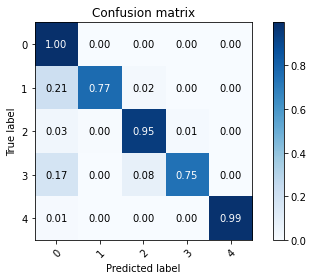

In [90]:
cnf_matrix = confusion_matrix(Y_test, pred_test)
class_names = [str(i) for i in range(5)]

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True)
plt.show()